In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from requests import get
from bs4 import BeautifulSoup
from bs4 import Comment

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold



In [ ]:
import os
path = '/content/drive/MyDrive/CME538 Project 2'
os.chdir(path)

# 1. Data wrangling
- NBA Stats API
- Basketball Reference Webscraping

In [ ]:
df_dpoy = pd.read_csv('dpoy_player_team_stats_1984_2022_final.csv')
df_dpoy = df_dpoy.sort_values('Year', ascending=False)
df_dpoy.head(10)

,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,...,Team_Off-eFG%,Team_Off-TOV%,Team_ORB%,Team_Off-FT/FGA,Team_Def-eFG%,Team_Def-TOV%,Team_DRB%,Team_Def-FT/FGA,Team_Arena,Team_Attend.
1134,Ish Wainright,27,PHO,0.0,0.0,0,0.000,45,8.0,2.4,...,0.549,11.6,22.3,0.176,0.510,13.0,77.1,0.195,Phoenix Suns Arena,"663,171"
630,D.J. Wilson,25,TOR,0.0,0.0,0,0.000,4,13.5,7.5,...,0.510,11.0,28.4,0.177,0.535,14.4,75.6,0.199,Scotiabank Arena,"547,343"
552,Robert Williams,24,BOS,1.0,8.0,500,0.016,61,29.6,10.0,...,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,"785,396"
554,Al Horford,35,BOS,0.0,3.0,500,0.006,69,29.1,10.2,...,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183,TD Garden,"785,396"
555,Draymond Green,31,GSW,0.0,2.0,500,0.004,46,28.9,7.5,...,0.552,13.5,22.8,0.181,0.509,13.0,78.7,0.201,Chase Center,"740,624"
556,Matisse Thybulle,24,PHI,0.0,1.0,500,0.002,66,25.5,5.7,...,0.534,11.6,20.1,0.232,0.524,12.1,76.8,0.192,Wells Fargo Center,"846,867"
563,Jaylen Morris,26,SAS,0.0,0.0,0,0.000,3,5.3,0.7,...,0.527,11.1,23.7,0.166,0.532,12.1,75.1,0.176,AT&T Center,"615,588"
576,Delon Wright,29,ATL,0.0,0.0,0,0.000,77,18.9,4.4,...,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,"672,742"
582,DeJon Jarreau,24,IND,0.0,0.0,0,0.000,1,1.0,0.0,...,0.531,12.7,25.5,0.184,0.552,11.9,76.2,0.204,Gainbridge Fieldhouse,"588,743"
611,Trae Young,23,ATL,0.0,0.0,0,0.000,76,34.9,28.4,...,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,State Farm Arena,"672,742"


In [ ]:
# look for NaN values
df_dpoy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 1134 to 0
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           1135 non-null   object 
 1   Age              1135 non-null   int64  
 2   Tm               1135 non-null   object 
 3   First            1135 non-null   float64
 4   Pts Won          1135 non-null   float64
 5   Pts Max          1135 non-null   int64  
 6   Share            1135 non-null   float64
 7   G                1135 non-null   int64  
 8   MP               1135 non-null   float64
 9   PTS              1135 non-null   float64
 10  TRB              1135 non-null   float64
 11  AST              1135 non-null   float64
 12  STL              1135 non-null   float64
 13  BLK              1135 non-null   float64
 14  FG%              1135 non-null   float64
 15  3P%              1135 non-null   float64
 16  FT%              1135 non-null   float64
 17  WS            

In [ ]:
# First, let's split the data into train, test data sets

train = df_dpoy[df_dpoy['Year'] != 2022]
test = df_dpoy[df_dpoy['Year'] == 2022]

print('Train {}%'.format(train.shape[0] / df_dpoy.shape[0] * 100))
print('Test {}%'.format(test.shape[0] / df_dpoy.shape[0] * 100))

Train 97.00440528634361%
Test 2.9955947136563874%


In [ ]:
train

,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,...,Team_Off-eFG%,Team_Off-TOV%,Team_ORB%,Team_Off-FT/FGA,Team_Def-eFG%,Team_Def-TOV%,Team_DRB%,Team_Def-FT/FGA,Team_Arena,Team_Attend.
538,Giannis Antetokounmpo,26,MIL,0.0,12.0,500,0.024,61,33.0,28.1,...,0.566,12.0,23.3,0.177,0.536,11.5,79.7,0.157,Fiserv Forum,"64,780"
534,Rudy Gobert,28,UTA,84.0,464.0,500,0.928,71,30.8,14.3,...,0.563,12.7,24.5,0.195,0.507,10.3,79.3,0.159,Vivint Smart Home Arena,"151,300"
740,Jake Layman,26,MIN,0.0,0.0,0,0.000,45,13.9,5.1,...,0.520,12.4,22.7,0.193,0.556,13.3,76.8,0.207,Target Center,"15,774"
738,Marques Bolden,22,CLE,0.0,0.0,0,0.000,6,4.8,1.2,...,0.508,13.9,23.6,0.194,0.556,13.0,76.6,0.183,Rocket Mortgage Fieldhouse,"91,476"
535,Ben Simmons,24,PHI,15.0,287.0,500,0.574,58,32.4,14.3,...,0.541,12.8,23.2,0.225,0.521,13.8,78.2,0.200,Wells Fargo Center,"68,583"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Mychal Thompson,29,POR,1.0,1.0,76,0.013,79,33.5,15.7,...,0.507,15.1,36.4,0.277,0.518,17.0,67.4,0.259,Memorial Coliseum,"518,306"
18,Jamaal Wilkes,30,LAL,1.0,1.0,76,0.013,75,33.4,17.3,...,0.536,16.1,33.7,0.236,0.487,14.3,66.6,0.232,The Forum,"622,401"
4,Michael Cooper,27,LAL,5.0,5.0,76,0.066,82,29.1,9.0,...,0.536,16.1,33.7,0.236,0.487,14.3,66.6,0.232,The Forum,"622,401"
3,Maurice Cheeks,27,PHI,5.0,5.0,76,0.066,75,33.3,12.7,...,0.497,16.9,34.6,0.299,0.484,16.0,65.9,0.246,The Spectrum,"588,139"


In [ ]:
# Now, let's remove the categorical column (except for psoition) to ensure all features within the dataset are numerical (for regression model testing purposes)

train_clean = train.drop(['Player', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Team_Team', 'Team_Arena', 'Team_Attend.'], axis = 1)
test_clean = test.drop(['Player', 'Tm', 'First', 'Pts Won', 'Pts Max', 'Team_Team', 'Team_Arena', 'Team_Attend.'], axis = 1)

train_for_accuracy = train[['Player', 'Year', 'Share']]

In [ ]:
#Encoding Pos column so we have numeric data type instead of categorical
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    train_clean[y] = le.fit_transform(train_clean[y])
    test_clean[y] = le.fit_transform(test_clean[y])
 
label_list = ['Pos']
 
for l in label_list:
    label_encoder(l)
 
#Display transformed data
train_clean.head()
test_clean.head()

,Age,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,...,Team_3PAr,Team_TS%,Team_Off-eFG%,Team_Off-TOV%,Team_ORB%,Team_Off-FT/FGA,Team_Def-eFG%,Team_Def-TOV%,Team_DRB%,Team_Def-FT/FGA
1134,27,0.000,45,8.0,2.4,1.2,0.3,0.4,0.1,0.394,...,0.354,0.581,0.549,11.6,22.3,0.176,0.510,13.0,77.1,0.195
630,25,0.000,4,13.5,7.5,4.0,1.3,1.3,0.3,0.733,...,0.375,0.543,0.510,11.0,28.4,0.177,0.535,14.4,75.6,0.199
552,24,0.016,61,29.6,10.0,9.6,2.0,0.9,2.2,0.736,...,0.425,0.578,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183
554,35,0.006,69,29.1,10.2,7.7,3.4,0.7,1.3,0.467,...,0.425,0.578,0.542,12.4,24.0,0.195,0.502,12.5,77.3,0.183
555,31,0.004,46,28.9,7.5,7.3,7.0,1.3,1.1,0.525,...,0.456,0.582,0.552,13.5,22.8,0.181,0.509,13.0,78.7,0.201


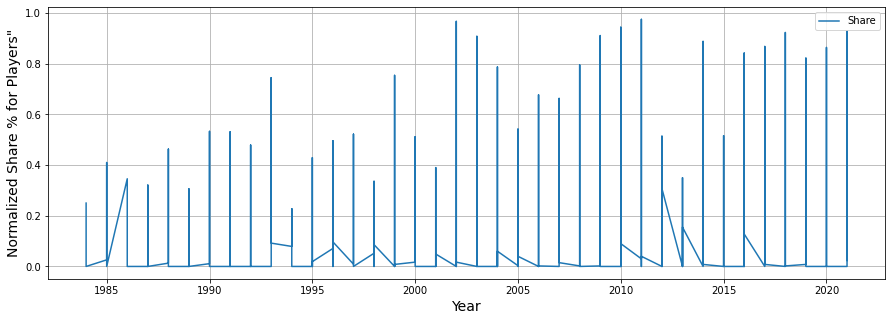

In [ ]:
# visualization of how every year corresponds to Share column
train_clean.plot(x='Year', y='Share', figsize=(15, 5), grid=True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Normalized Share % for Players"', fontsize=14)
plt.show()

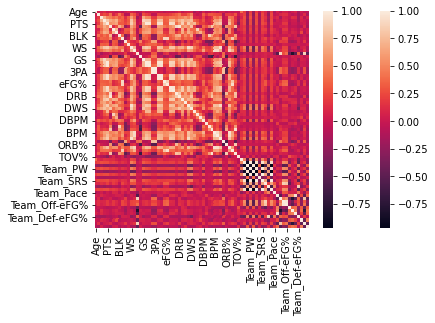

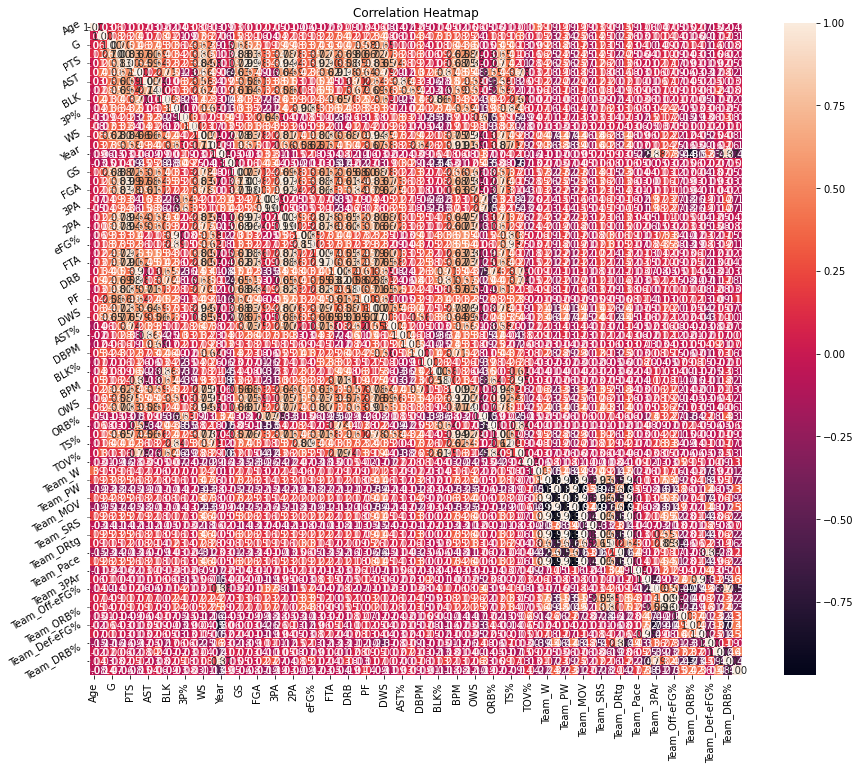

In [ ]:
import seaborn as sn

corr_matrix = train_clean.corr()
sn.heatmap(corr_matrix)

sn.heatmap(corr_matrix)
plt.figure(figsize=(15,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
# split into train and test sets

X = train_clean.drop(['Share'], axis = 1)
y = train_clean.loc[:,'Share']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (770, 71) (770,)
Test (331, 71) (331,)


In [ ]:
#def add_features(df):
    #"""Augment a dataframe df with additional features."""
    #df_temp = df.copy()
    

    #df_temp.loc[:, 'total_stl_block'] = df_dpoy['STL'] + df_dpoy['BLK'] 
   # df_temp.loc[:, 'total_rebound_stl_block'] = df_dpoy['TRB']+ df_dpoy['STL'] + df_dpoy['BLK'] 
   # df_temp.loc[:, 'MaxPoints_subtract_pointsWon'] = df_dpoy['Pts Max']- df_dpoy['Pts Won'] 
   


   
   # return df_temp

# Add features to train 
#df_dpoy_train = add_features(df_dpoy)

# View train DataFrame
#df_dpoy_train.head()

In [ ]:
# fit the model using all features

model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


MAE: 0.075


We would prefer to use a subset of features that achieves an error that is as good or better than this.


In [ ]:
# feature selection using Select K best
# We will see if using all features would result in lower MAE score

def select_features(X_train, y_train, X_test):
 # configure to select a subset of features
 fs = SelectKBest(score_func=mutual_info_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
 
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.075


No change, lets find the optimal number of features that will result in lower MAE score

In [ ]:


# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -0.014
Best Config: {'sel__k': 51}
>-0.014 with: {'sel__k': 51}
>-0.014 with: {'sel__k': 52}
>-0.014 with: {'sel__k': 53}
>-0.014 with: {'sel__k': 54}
>-0.014 with: {'sel__k': 55}
>-0.014 with: {'sel__k': 56}
>-0.014 with: {'sel__k': 57}
>-0.014 with: {'sel__k': 58}
>-0.014 with: {'sel__k': 59}
>-0.014 with: {'sel__k': 60}
>-0.014 with: {'sel__k': 61}
>-0.014 with: {'sel__k': 62}
>-0.014 with: {'sel__k': 63}
>-0.014 with: {'sel__k': 64}
>-0.014 with: {'sel__k': 65}
>-0.014 with: {'sel__k': 66}
>-0.014 with: {'sel__k': 67}
>-0.014 with: {'sel__k': 68}
>-0.014 with: {'sel__k': 69}
>-0.014 with: {'sel__k': 70}
>-0.014 with: {'sel__k': 71}


we know now that 51 features is what we need to train our model with ( it gives MAE to be 0.014 (much lower than what we started with)

Feature 0: 0.055545
Feature 1: 0.153921
Feature 2: 0.278257
Feature 3: 0.173178
Feature 4: 0.233843
Feature 5: 0.078954
Feature 6: 0.153114
Feature 7: 0.200681
Feature 8: 0.071469
Feature 9: 0.000000
Feature 10: 0.019076
Feature 11: 0.286302
Feature 12: 0.188252
Feature 13: 0.175849
Feature 14: 0.027697
Feature 15: 0.279179
Feature 16: 0.161130
Feature 17: 0.185726
Feature 18: 0.026364
Feature 19: 0.023418
Feature 20: 0.141593
Feature 21: 0.158262
Feature 22: 0.094693
Feature 23: 0.070789
Feature 24: 0.139081
Feature 25: 0.156608
Feature 26: 0.148879
Feature 27: 0.202578
Feature 28: 0.167728
Feature 29: 0.115639
Feature 30: 0.326528
Feature 31: 0.438756
Feature 32: 0.000000
Feature 33: 0.011786
Feature 34: 0.035375
Feature 35: 0.206644
Feature 36: 0.040137
Feature 37: 0.091549
Feature 38: 0.064623
Feature 39: 0.256708
Feature 40: 0.118124
Feature 41: 0.203536
Feature 42: 0.041526
Feature 43: 0.021347
Feature 44: 0.164890
Feature 45: 0.061684
Feature 46: 0.021402
Feature 47: 0.038434
Fe

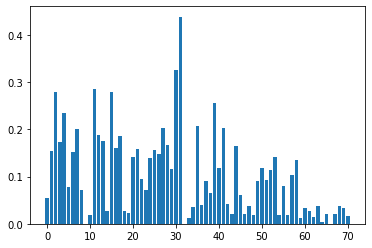

In [ ]:


# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k=51)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
print(fs.scores_[-10:])

[0.20257753 0.203536   0.2066437  0.23384276 0.25670794 0.27825669
 0.27917934 0.28630196 0.32652774 0.43875556]


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 1027 to 1008
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              770 non-null    int64  
 1   G                770 non-null    int64  
 2   MP               770 non-null    float64
 3   PTS              770 non-null    float64
 4   TRB              770 non-null    float64
 5   AST              770 non-null    float64
 6   STL              770 non-null    float64
 7   BLK              770 non-null    float64
 8   FG%              770 non-null    float64
 9   3P%              770 non-null    float64
 10  FT%              770 non-null    float64
 11  WS               770 non-null    float64
 12  WS/48            770 non-null    float64
 13  Year             770 non-null    int64  
 14  Pos              770 non-null    int64  
 15  GS               770 non-null    int64  
 16  FG               770 non-null    float64
 17  FGA         

In summary, The features that gave the highest corelations are ['G', 'MP', 'PTS','TRB', 'BLK','WS','GS','VORP', BPM']
